In [ ]:
# Analysis Observations:

    # 1. The Capomulin regimen had a high correlation (0.84) between mouse weight and average tumor volume.
    
    # 2. The drug regimens Ramicane and Capomulin had the highest number of mice tested by a significant percentage.
    
    # 3. The drug regimen Infubinol, the only regimen among the top four with potential outliers, had two potential outliers: 31 and 36.321346.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from functools import reduce
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview

merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.

mouse_count = len(merged_data["Mouse ID"].unique())

mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_rows = merged_data[merged_data.duplicated(["Mouse ID", "Timepoint"])]

duplicate_mouseid = duplicate_rows["Mouse ID"].unique()

duplicate_mouseid

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse = merged_data.loc[merged_data["Mouse ID"] == "g989"]

duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

data = merged_data.loc[merged_data["Mouse ID"] != "g989"]

data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.

new_mice_count = len(data["Mouse ID"].unique())

new_mice_count

248

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


mean_tumor = data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]



median_tumor = data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]



std_tumor = data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]



var_tumor = data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]



sem_tumor = data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]



new_df = pd.DataFrame(
    {
        "Mean Tumor Volume": mean_tumor,
        "Median Tumor Volume": median_tumor,
        "Tumor Volume Variance": var_tumor,
        "Tumor Volume Std. Dev.": std_tumor,
        "Tumor Volume Std. Err.": sem_tumor
    })

new_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Text(0.5, 1.0, 'Timepoint Totals Per Regimen')

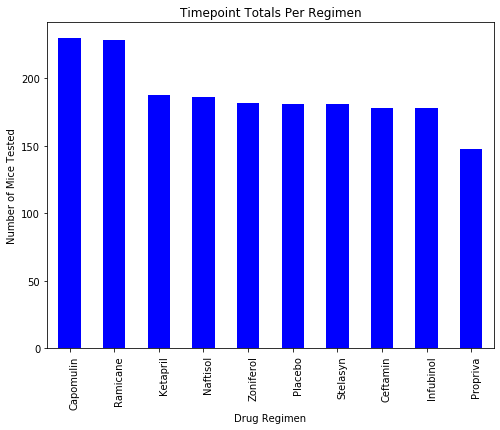

In [8]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timepoints_data = data[["Drug Regimen", "Timepoint"]]

timepoint_totals = timepoints_data.groupby("Drug Regimen").count()

timepoint_totals = timepoint_totals.sort_values("Timepoint", ascending=False)

figure1 = timepoint_totals.plot(kind="bar", facecolor="blue", figsize=(8,6), legend=None)

# Configure x-tick rotation
xticklabels = timepoint_totals.index
figure1.set_xticklabels(xticklabels, rotation=90, rotation_mode="anchor", ha="right", wrap=True)

# Show plot

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Timepoint Totals Per Regimen")


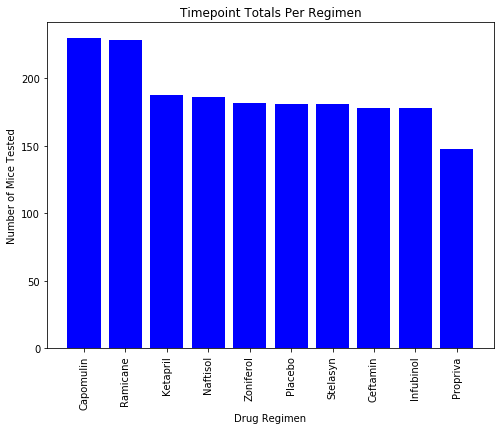

In [9]:
regimens = list(timepoint_totals.index)

values = list(timepoint_totals["Timepoint"])

figure2 = plt.figure(figsize = (8,6))
 
# creating the bar plot
plt.bar(regimens, values, color ='blue',width = 0.8)
 
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Timepoint Totals Per Regimen")

plt.xticks(rotation=90)

plt.show()


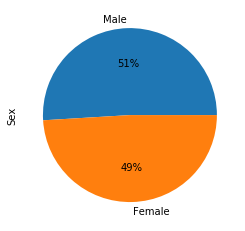

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


gender = data[["Mouse ID", "Sex"]]

gender_count = gender["Sex"].value_counts()

gender_count = pd.DataFrame(gender_count)

pandas_plot = gender_count.plot.pie(subplots=True, autopct="%1.0f%%", legend=None)



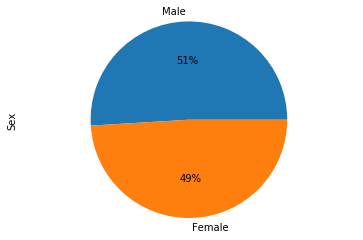

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

genders = list(gender_count.index)
micegender_counts = gender_count["Sex"]
x_axis = np.arange(0, len(genders))

plt.pie(micegender_counts, labels=genders, autopct="%1.0f%%")

plt.axis("equal")

plt.ylabel("Sex")

plt.show()

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = data.groupby("Mouse ID")["Timepoint"].max()

last_timepoint = last_timepoint.reset_index()

last_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged = last_timepoint.merge(data, how="inner", on=["Mouse ID", "Timepoint"])

merged.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [13]:
# Put treatments into a list for for loop (and later for plot labels)

regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumorvol = []
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for regimen in regimens:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    final_tumor_vol = merged.loc[merged["Drug Regimen"] == regimen, 'Tumor Volume (mm3)']
    
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
        
    # add subset 
    
    tumorvol.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    
    print(f"{regimen}'s potential outliers: {outliers}")
    


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


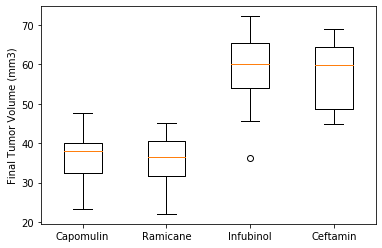

In [14]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumorvol)

ax1.set_xticklabels(regimens)


plt.show()

Text(0, 0.5, 'Tumor Volume (mm3)')

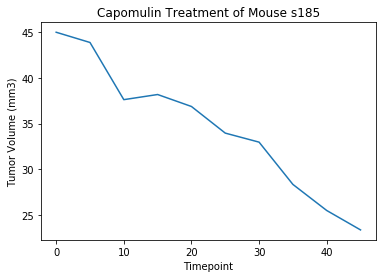

In [15]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capo_mouse = data.loc[data["Mouse ID"] == "s185"]

capo_mouse = capo_mouse[["Timepoint", "Tumor Volume (mm3)"]]

capo_mouse.plot.line("Timepoint", "Tumor Volume (mm3)", legend=None)

plt.title("Capomulin Treatment of Mouse s185")
plt.ylabel("Tumor Volume (mm3)")


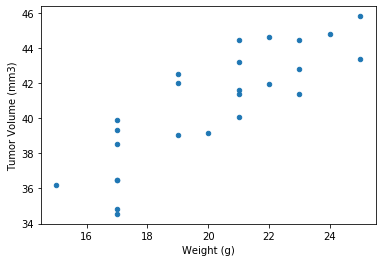

In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_mice = data.loc[data["Drug Regimen"] == "Capomulin"]


capomulin_micegrouped = capomulin_mice.groupby("Mouse ID").mean()


capomulin_micegrouped.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)")

plt.show()


The correlation between mouse weight and the average tumor volume is 0.84


Text(0, 0.5, 'Average Tumor Volume (mm3)')

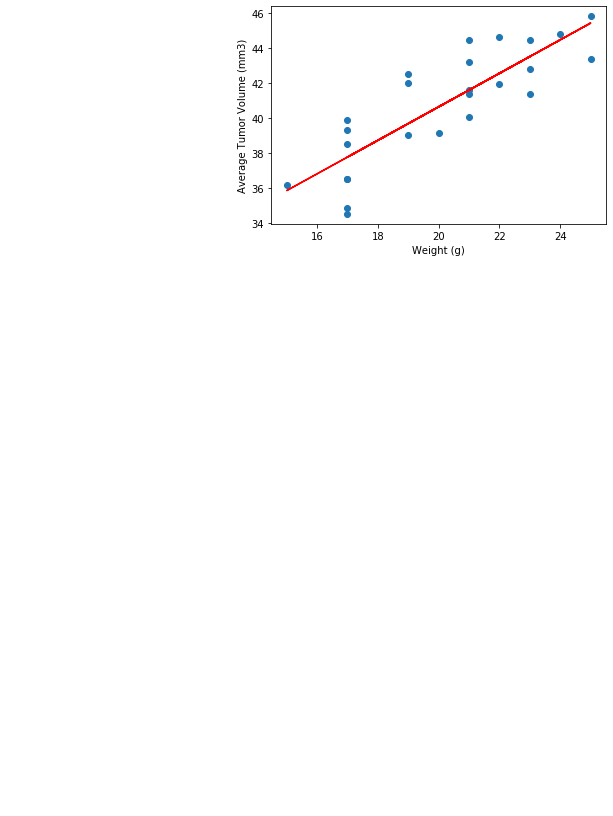

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(capomulin_micegrouped["Weight (g)"], capomulin_micegrouped["Tumor Volume (mm3)"])

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")


x_values = capomulin_micegrouped["Weight (g)"]
y_values = capomulin_micegrouped["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.xlabel("Weight (g)")

plt.ylabel("Average Tumor Volume (mm3)")
